# End to End Machine Learning with Deployment

### Part 1- EDA of Medical Dataset 
1. Import the libraries
2. Load the data and view it
3. Clean the data 
4. Perform EDA 

### Part 2- Modelling of Dataset 
5. Preprocessing
6. Fitting and Evaluation
7. Optimization
8. Interpretation
9. Model Deploytment

In [1]:
# !pip install xgboost --quiet

In [2]:
# !pip install streamlit --quiet


ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
spyder 5.2.2 requires pyqt5<5.13, which is not installed.
spyder 5.2.2 requires pyqtwebengine<5.13, which is not installed.


In [3]:
# !pip install imbalanced-learn --quiet

### Step1: Import the libraries


In [35]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns 
import warnings
plt.style.use('fivethirtyeight')
warnings.filterwarnings("ignore")

# libraries for preprocessing 
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler
from imblearn.over_sampling import SMOTE

# libraries for model fitting
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier, GradientBoostingClassifier
from xgboost import XGBClassifier
from sklearn.svm import SVC

# libraries for model evaluation
from sklearn.metrics import accuracy_score, recall_score, precision_score, f1_score, roc_auc_score
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.metrics import plot_confusion_matrix, plot_roc_curve, plot_precision_recall_curve

print("All libraries are imported")

All libraries are imported


### Step 2: Load the data and view it

In [36]:
data=pd.read_csv("data.csv")
data.head(10)

,Unnamed: 0,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,0,6,148,72,35,0,33.6,0.627,50,Yes
1,1,1,85,66,29,0,26.6,0.351,31,No
2,2,8,183,64,0,0,23.3,0.672,32,Yes
3,3,1,89,66,23,94,28.1,0.167,21,No
4,4,0,137,40,35,168,43.1,2.288,33,Yes
5,5,5,116,74,0,0,25.6,0.201,30,No
6,6,3,78,50,32,88,31.0,0.248,26,Yes
7,7,10,115,0,0,0,35.3,0.134,29,No
8,8,2,197,70,45,543,30.5,0.158,53,Yes
9,9,8,125,96,0,0,0.0,0.232,54,Yes


In [37]:
data.shape

(768, 10)

In [38]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 10 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Unnamed: 0                768 non-null    int64  
 1   Pregnancies               768 non-null    int64  
 2   Glucose                   768 non-null    int64  
 3   BloodPressure             768 non-null    int64  
 4   SkinThickness             768 non-null    int64  
 5   Insulin                   768 non-null    int64  
 6   BMI                       768 non-null    float64
 7   DiabetesPedigreeFunction  768 non-null    float64
 8   Age                       768 non-null    int64  
 9   Outcome                   768 non-null    object 
dtypes: float64(2), int64(7), object(1)
memory usage: 60.1+ KB


In [39]:
data.describe().T

,count,mean,std,min,25%,50%,75%,max
Unnamed: 0,768.0,383.500000,221.846794,0.000,191.75000,383.5000,575.25000,767.00
Pregnancies,768.0,3.845052,3.369578,0.000,1.00000,3.0000,6.00000,17.00
Glucose,768.0,120.894531,31.972618,0.000,99.00000,117.0000,140.25000,199.00
BloodPressure,768.0,69.105469,19.355807,0.000,62.00000,72.0000,80.00000,122.00
SkinThickness,768.0,20.536458,15.952218,0.000,0.00000,23.0000,32.00000,99.00
Insulin,768.0,79.799479,115.244002,0.000,0.00000,30.5000,127.25000,846.00
BMI,768.0,31.992578,7.884160,0.000,27.30000,32.0000,36.60000,67.10
DiabetesPedigreeFunction,768.0,0.471876,0.331329,0.078,0.24375,0.3725,0.62625,2.42
Age,768.0,33.240885,11.760232,21.000,24.00000,29.0000,41.00000,81.00


In [40]:
data[~data.applymap(np.isreal).any(1)]

,Unnamed: 0,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome


**Observations**
1. The dataset has 768 rows and 10 columns.
2. The column 'Unnamed: 0' is redundant.
3. There are no nulls.
4. However there are 0's present as null which we have to take care of.
5. There are no corrupt characters.

### Step 3: Clean the data 

In [41]:
data.drop('Unnamed: 0', axis=1, inplace=True)

In [42]:
zerofiller=lambda x:x.replace(0, x.median())
cols=data.columns[1:6]
data[cols]=data[cols].apply(zerofiller, 0)

In [43]:
# encode the categorical outcome variable
df=data.copy()
d={"Yes":1, 'No':0}
df['Outcome']=df['Outcome'].map(d)

In [44]:
df.head(2)

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,30.5,33.6,0.627,50,1
1,1,85,66,29,30.5,26.6,0.351,31,0


### Step 4: Perform EDA 
1. Univariates- Numerical.
2. Univariates- Categorical.
3. Bivariate - Categorical vs Numerical.
4. Bivariate - Numerical vs Numerical. 
5. Multivariate Pairplot.
6. Correlations and Heatmpap.
7. Outcome is a binary categorical variable.

In [45]:
def histograms(df):
    df.hist()
    plt.tight_layout()
    plt.show()

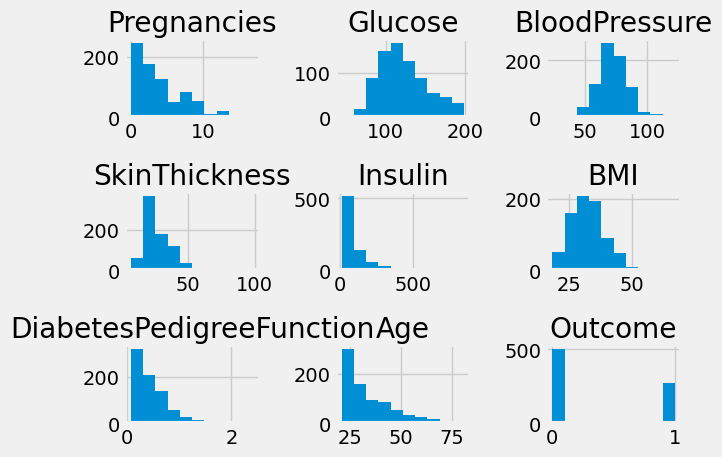

In [46]:
histograms(df)

In [47]:
def barplot(data, feature):
    print("Bar plot of the variable ", feature)
    plt.figure(figsize=(10,7))
    ax=sns.countplot(data=data, x=feature, color='green')
    for p in ax.patches:
        x=p.get_bbox().get_points()[:,0]
        y=p.get_bbox().get_points()[1,1]
        ax.annotate("{:.2g}%".format(100.*y/len(df)), (x.mean(), y), ha='center', va='bottom')
    plt.show()

Bar plot of the variable  Outcome


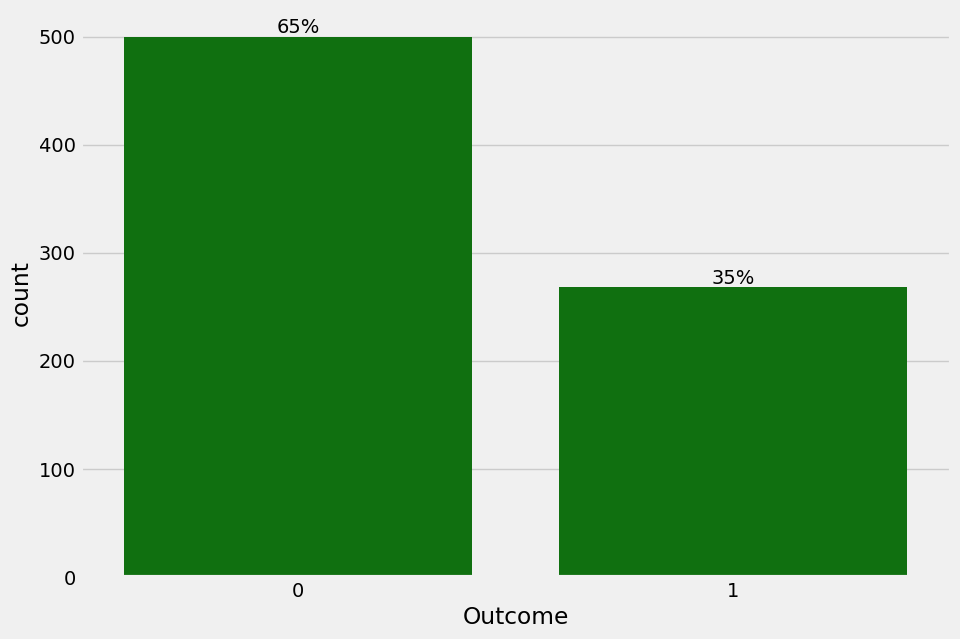

In [48]:
barplot(df, 'Outcome')

In [49]:
def boxplot_histplot(data, feature, bins=None, figsize=(12,7)):
    print('Boxplot and Histplot for ', feature)
    fig, (ax_box, ax_hist)=plt.subplots(
    nrows=2,
    sharex=True,
    gridspec_kw = {"height_ratios":(0.25, 0.75)},
    figsize=figsize
    )
    sns.boxplot(data=data, x=feature, color='violet', ax=ax_box, showmeans=True)
    sns.histplotplot(data=data, x=feature, ax=ax_hist, bins=bins)   if bins else sns.histplot(data\
                            =data, x=feature, ax=ax_hist)  
    ax_hist.axvline(data[feature].mean(), color='green', linestyle='--')
    ax_hist.axvline(data[feature].median(), color='black', linestyle='-')
    plt.show()
    

Boxplot and Histplot for  Pregnancies


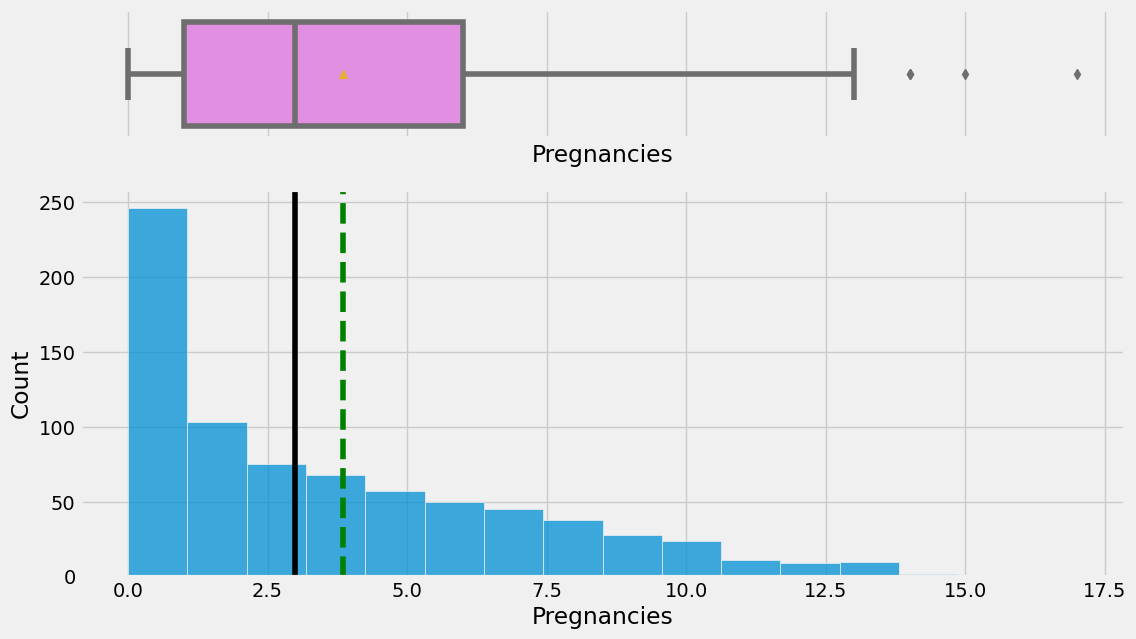

Boxplot and Histplot for  Glucose


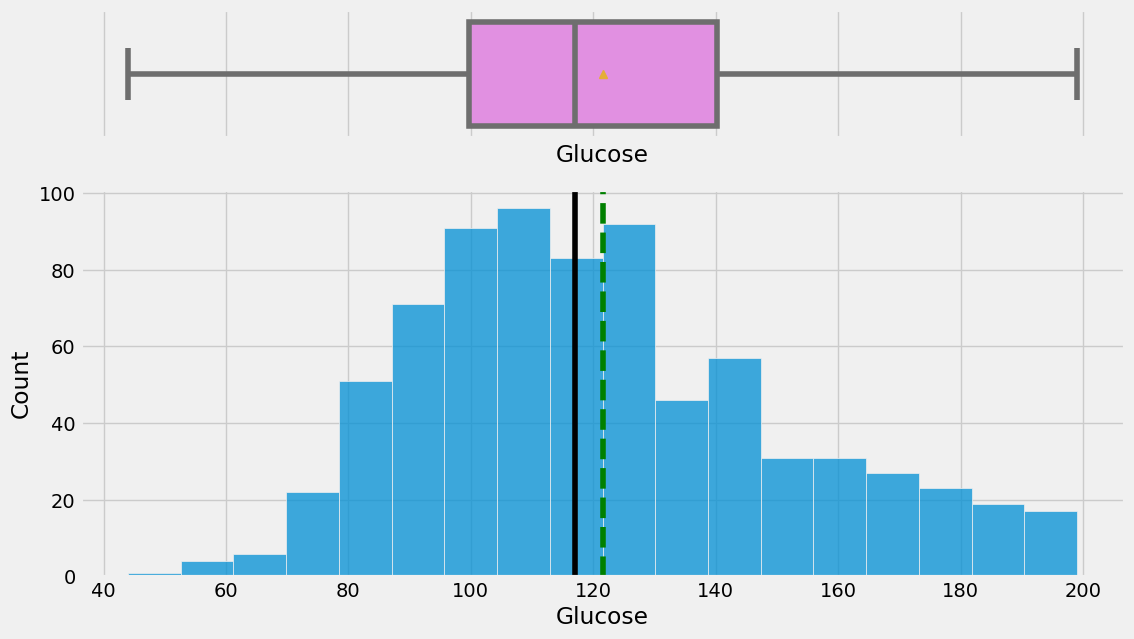

Boxplot and Histplot for  BloodPressure


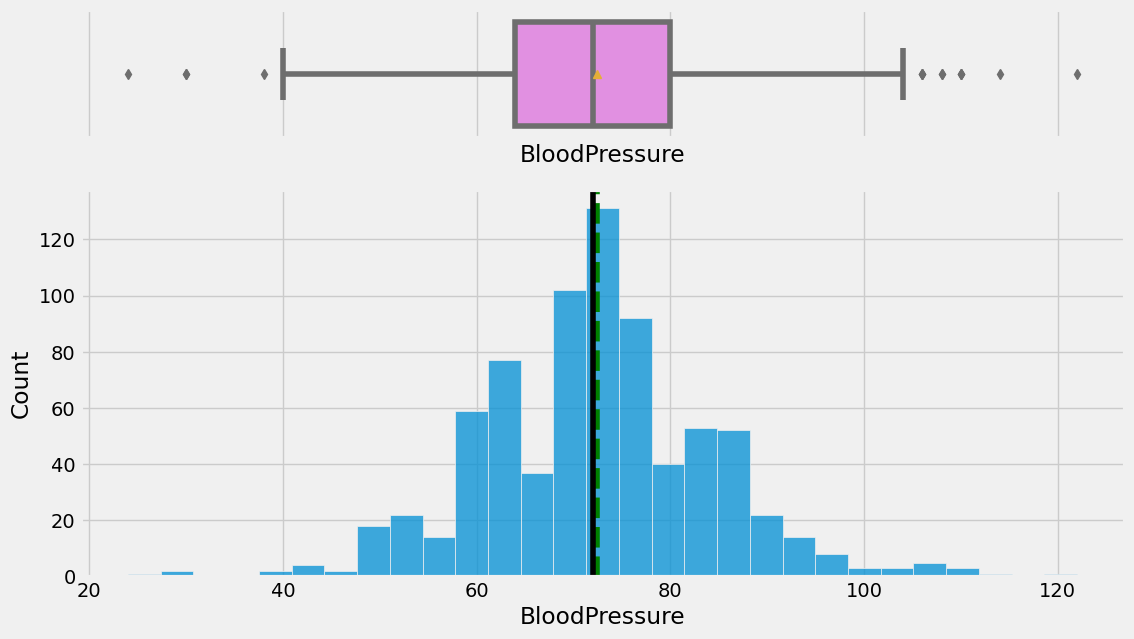

Boxplot and Histplot for  SkinThickness


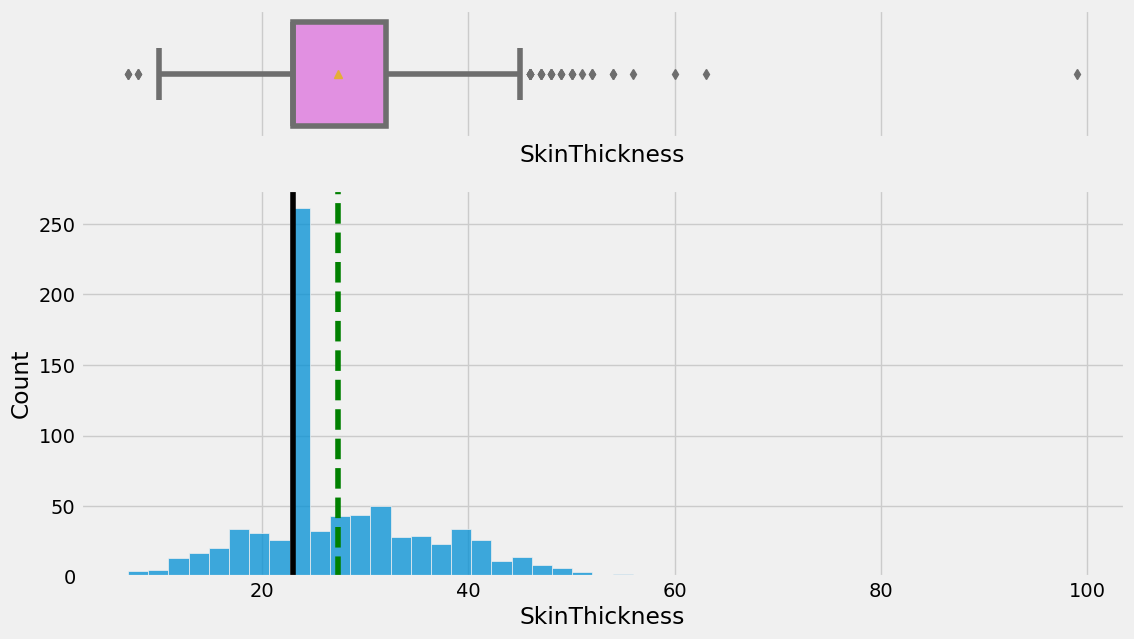

Boxplot and Histplot for  Insulin


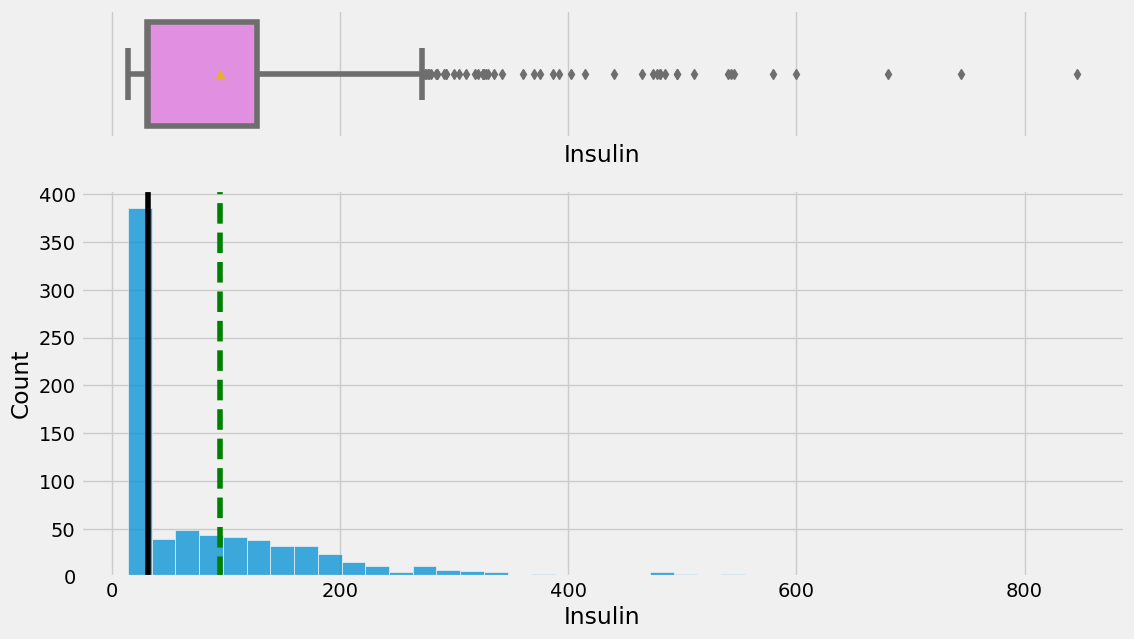

Boxplot and Histplot for  BMI


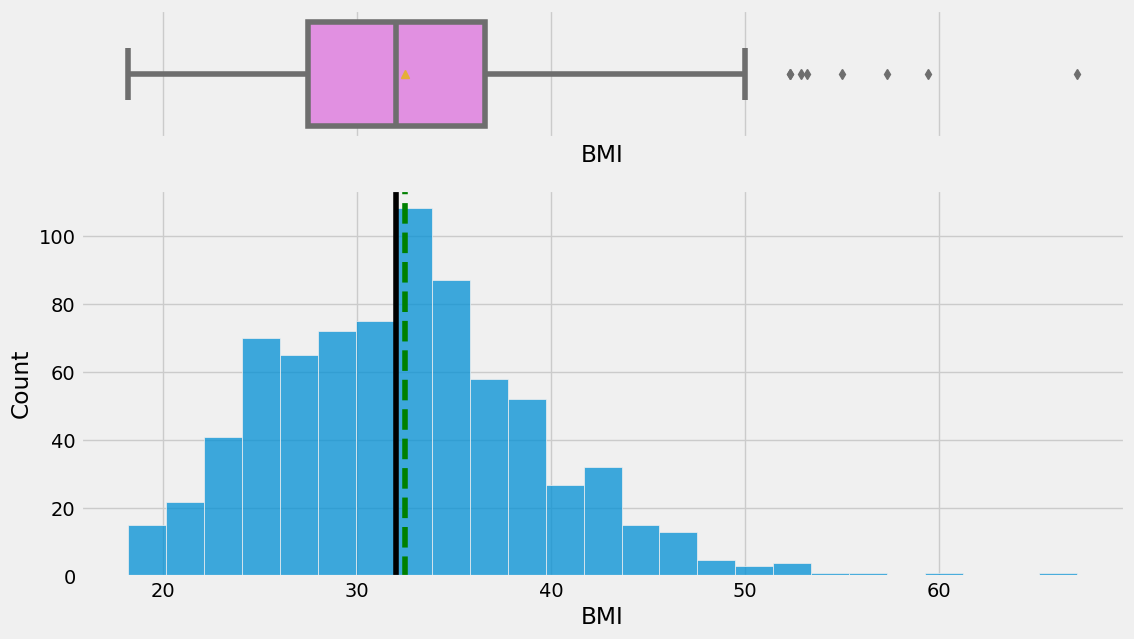

Boxplot and Histplot for  DiabetesPedigreeFunction


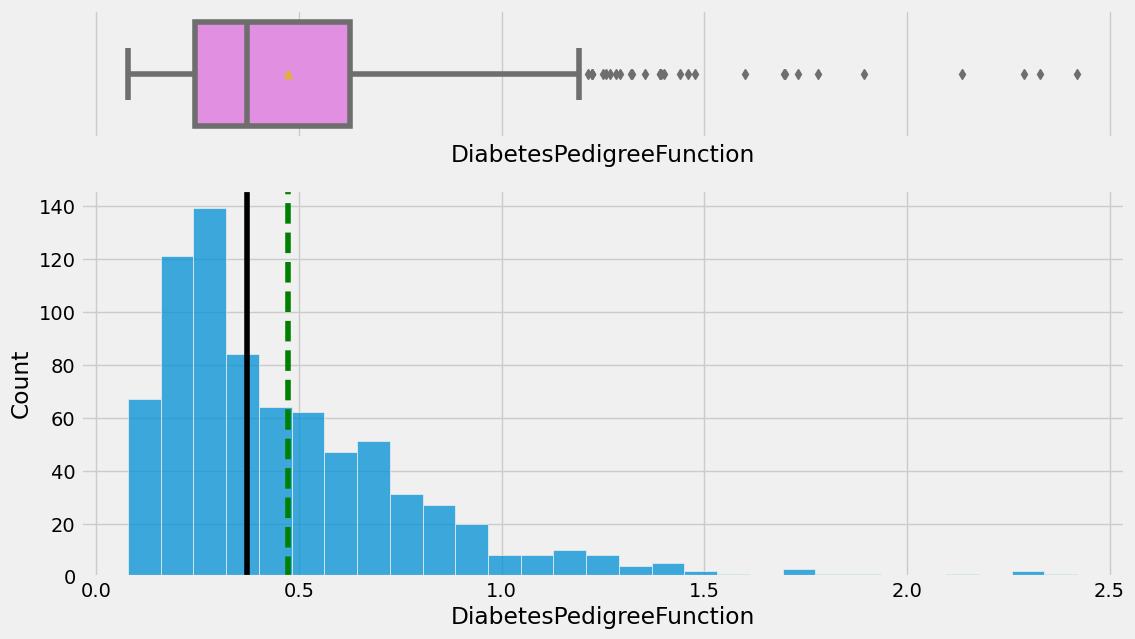

Boxplot and Histplot for  Age


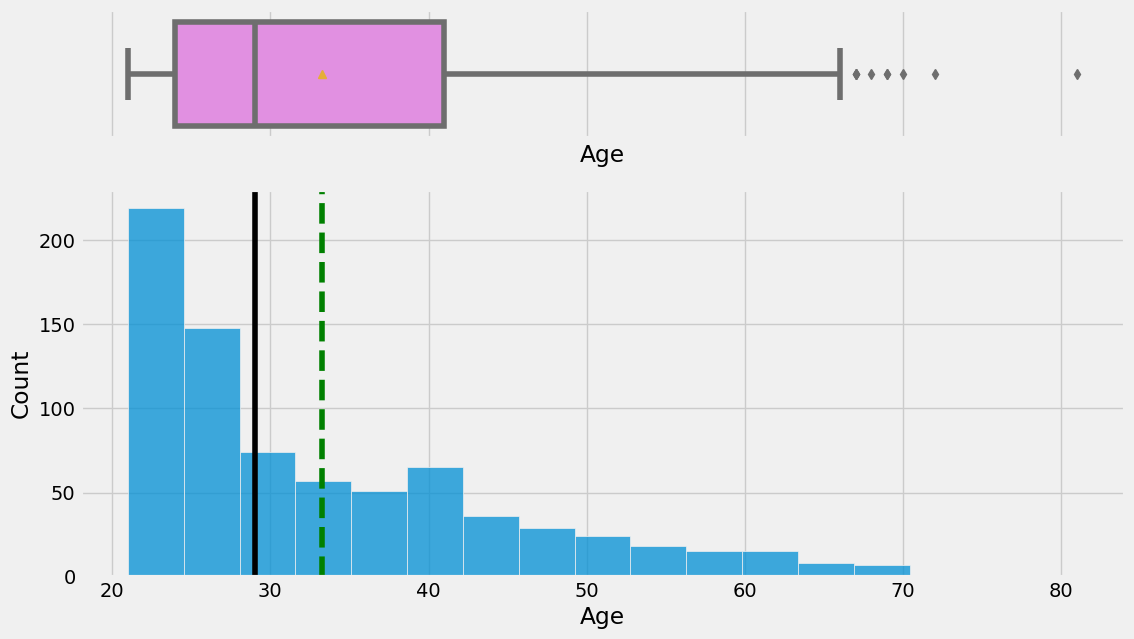

Boxplot and Histplot for  Outcome


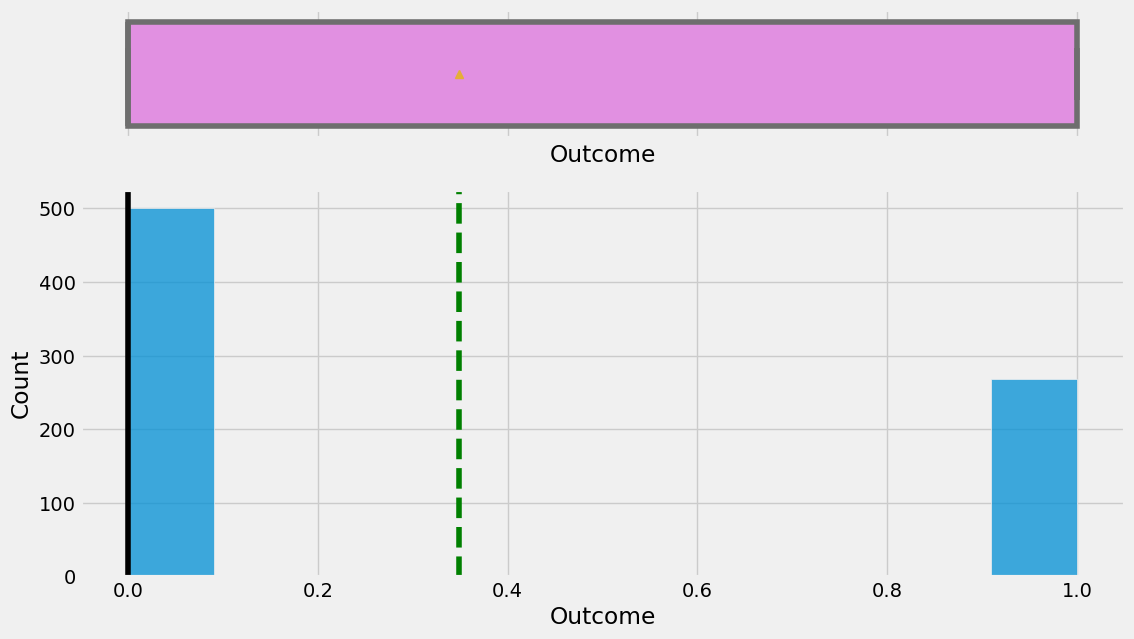

In [50]:
for col in df.select_dtypes(exclude='O').columns:
    boxplot_histplot(df, col)

**Observations**
1. We see that Pregnancies, Insulin, Dpf and Age are huighly right skewed
2. Wee see that Outcome is highly imbalanced
3. We see that skin thickness, insulin and Dpf have very high amount of outliers 

**Bivariate Analysis**

In [51]:
def catnum(data, feature1, feature2):
    print("The Bivariate barchart between {0} and {1}".format(feature1, feature2))
    data.groupby(feature1)[feature2].mean().plot(kind='bar', color='orange')
    plt.show()

The Bivariate barchart between Outcome and Pregnancies


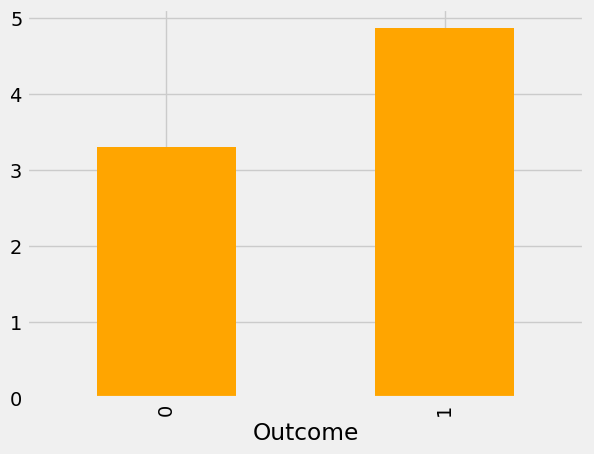

The Bivariate barchart between Outcome and Glucose


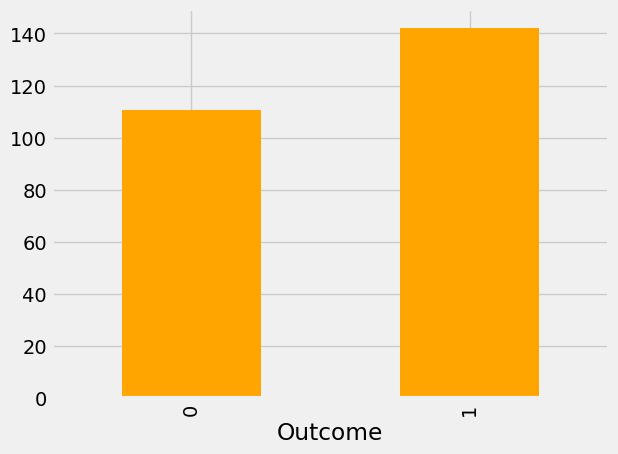

The Bivariate barchart between Outcome and BloodPressure


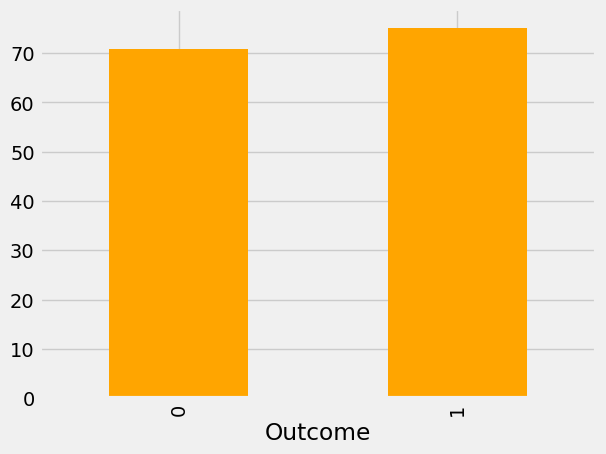

The Bivariate barchart between Outcome and SkinThickness


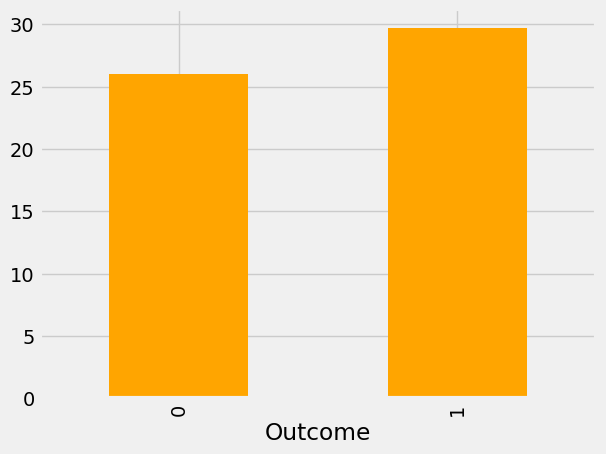

The Bivariate barchart between Outcome and Insulin


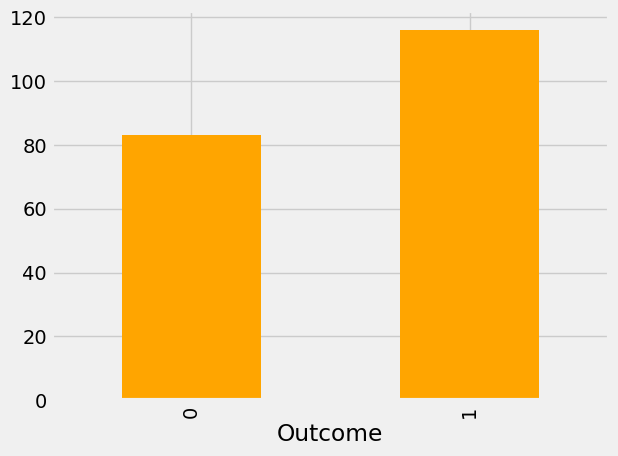

The Bivariate barchart between Outcome and BMI


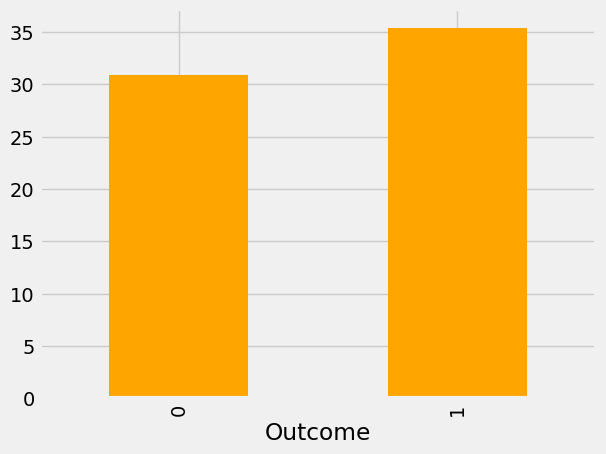

The Bivariate barchart between Outcome and DiabetesPedigreeFunction


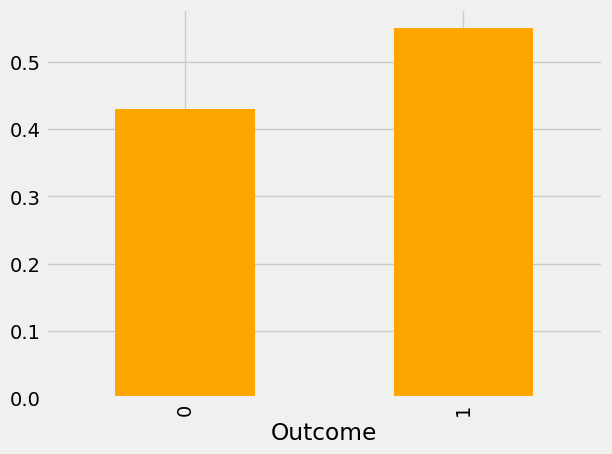

The Bivariate barchart between Outcome and Age


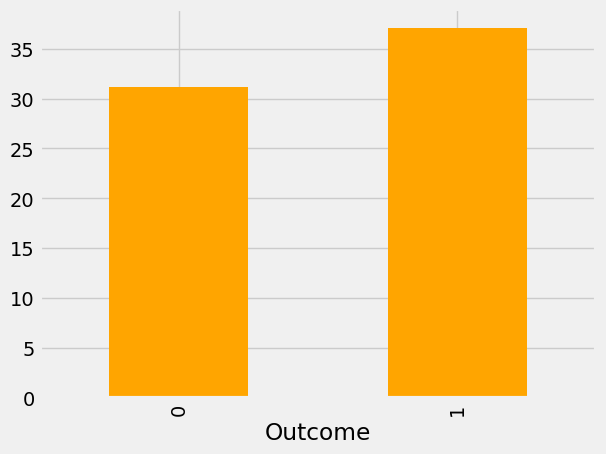

The Bivariate barchart between Outcome and Outcome


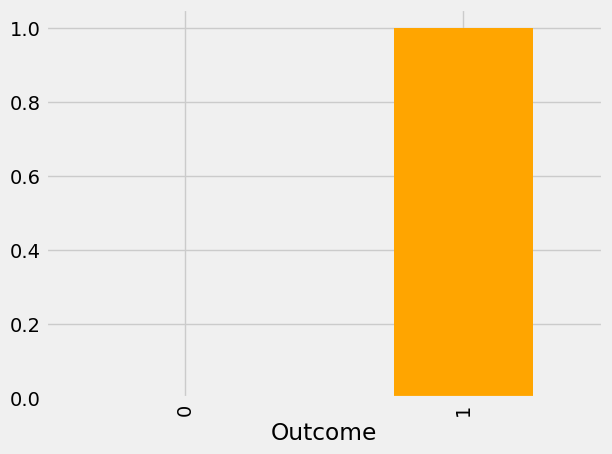

In [52]:
for col in df.select_dtypes(exclude='O').columns:
    catnum(df,'Outcome' ,col)

**Observation**
The graphs show that women with higher no.of pregnancies, hiugher glucose level, higher insulin level , higher dpf and age are more likely tobe diabetic |

In [53]:
def lineplot_scatterplot(data, feature1, feature2):
    plt.figure(figsize=(16,7))
    print("Bivariates between {0} and {1}".format(feature1, feature2))
    plt.subplot(1,2,1)
    sns.lineplot(data=data, x=feature1, y=feature2, color='green')
    plt.title('Lineplot')
    plt.subplot(1,2,2)
    sns.scatterplot(data=data, x=feature1, y=feature2, color='blue')
    plt.title('Scatterplot')
    plt.show()
    

Bivariates between Age and Pregnancies


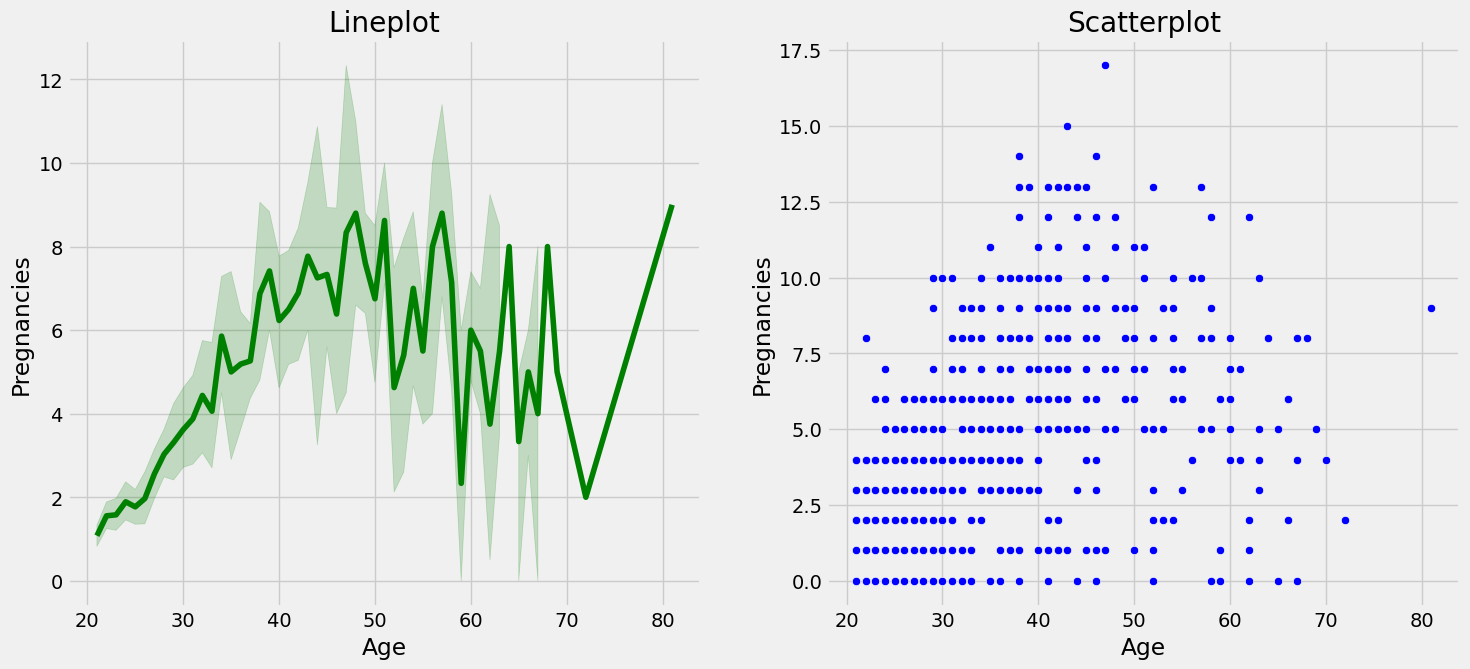

Bivariates between Age and Glucose


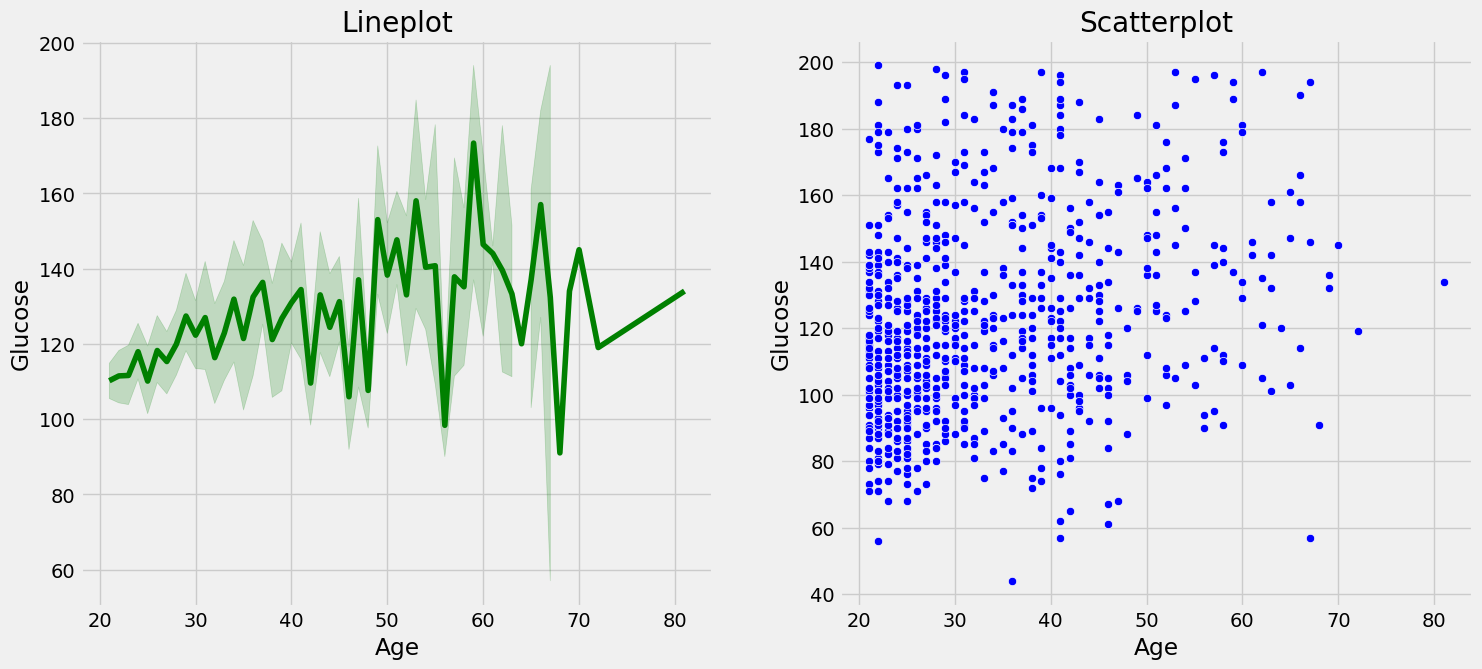

Bivariates between Age and BloodPressure


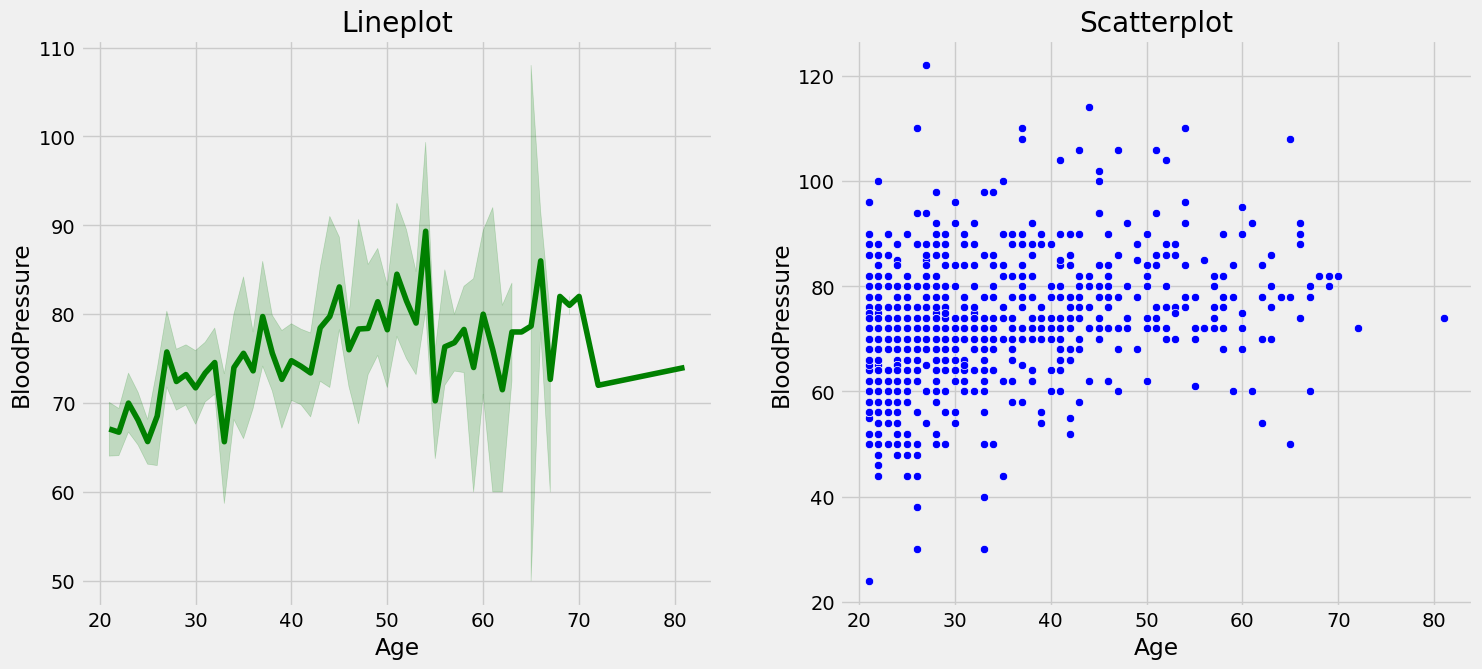

Bivariates between Age and SkinThickness


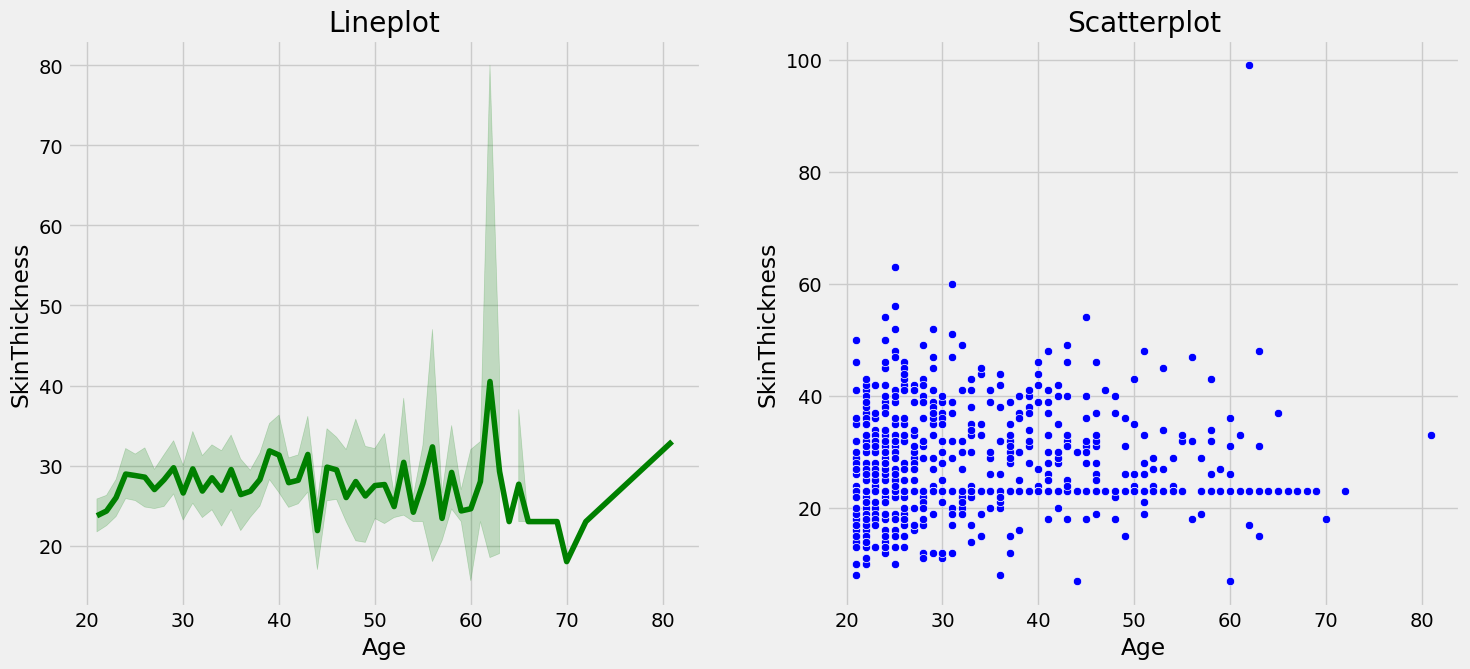

Bivariates between Age and Insulin


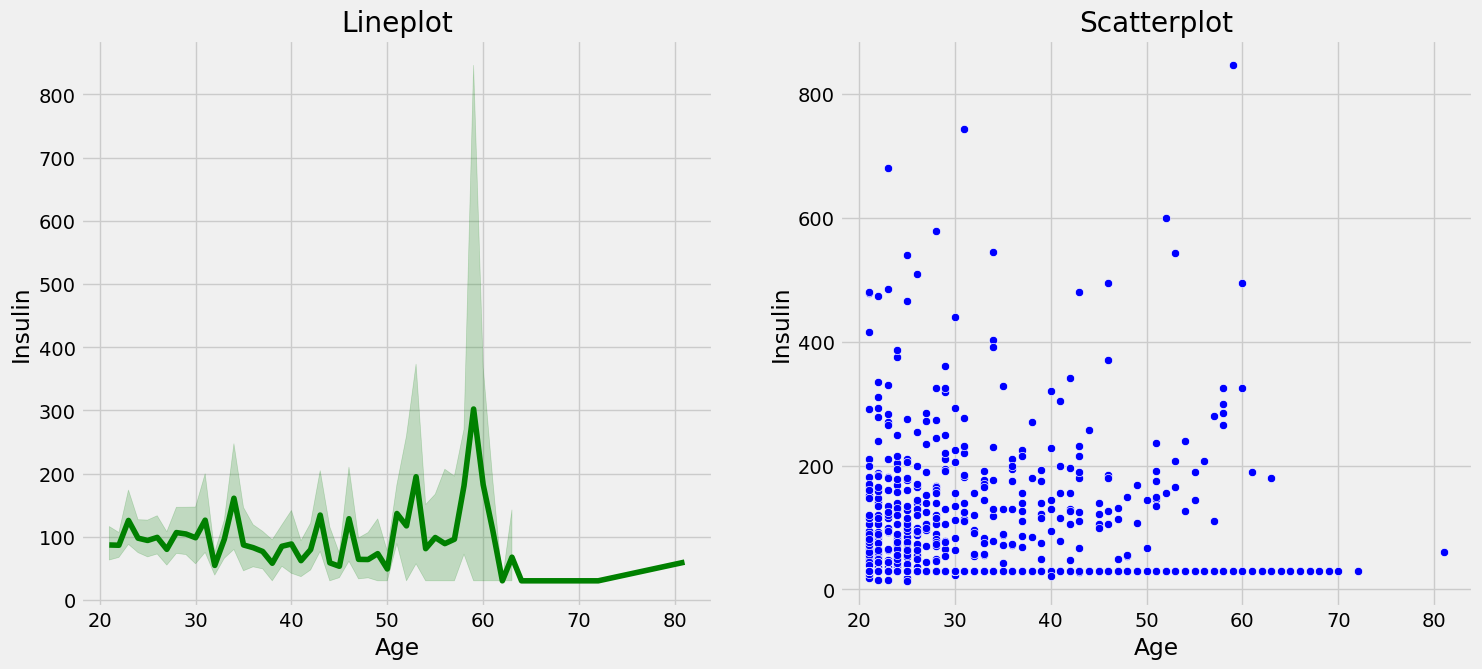

Bivariates between Age and BMI


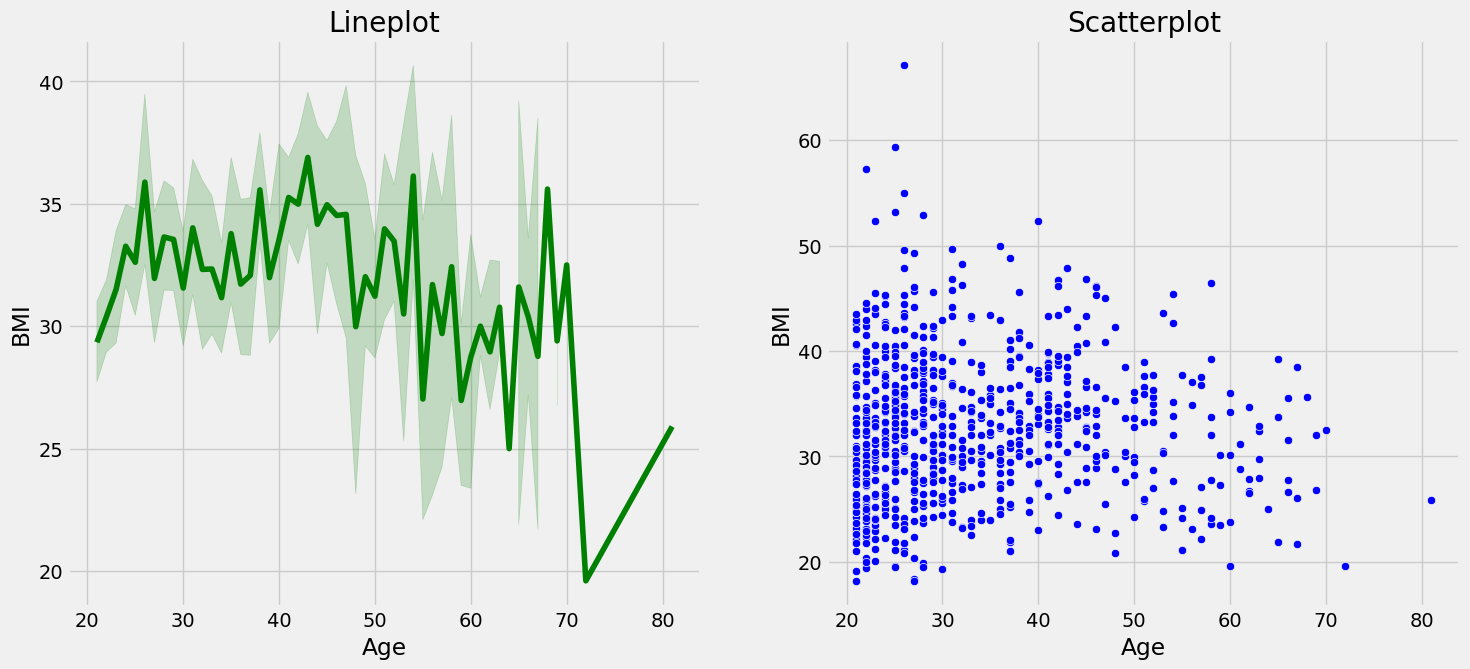

Bivariates between Age and DiabetesPedigreeFunction


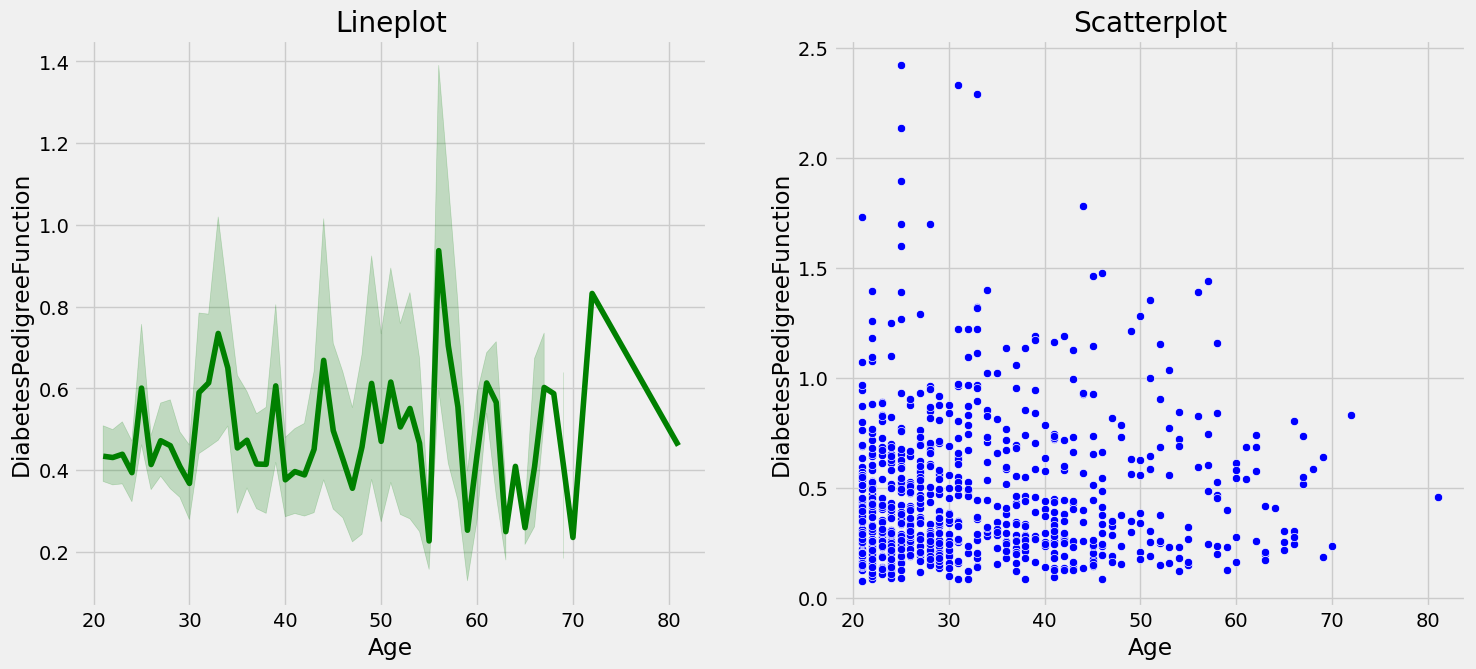

Bivariates between Age and Age


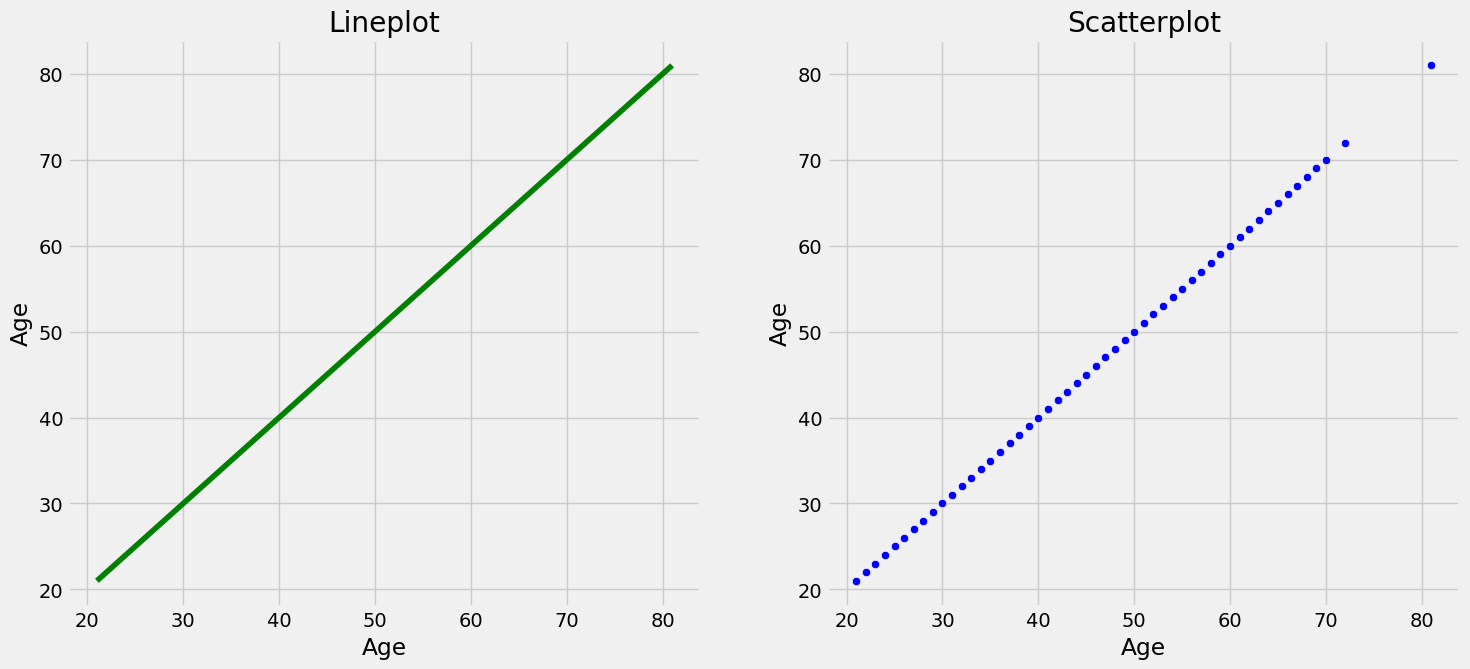

Bivariates between Age and Outcome


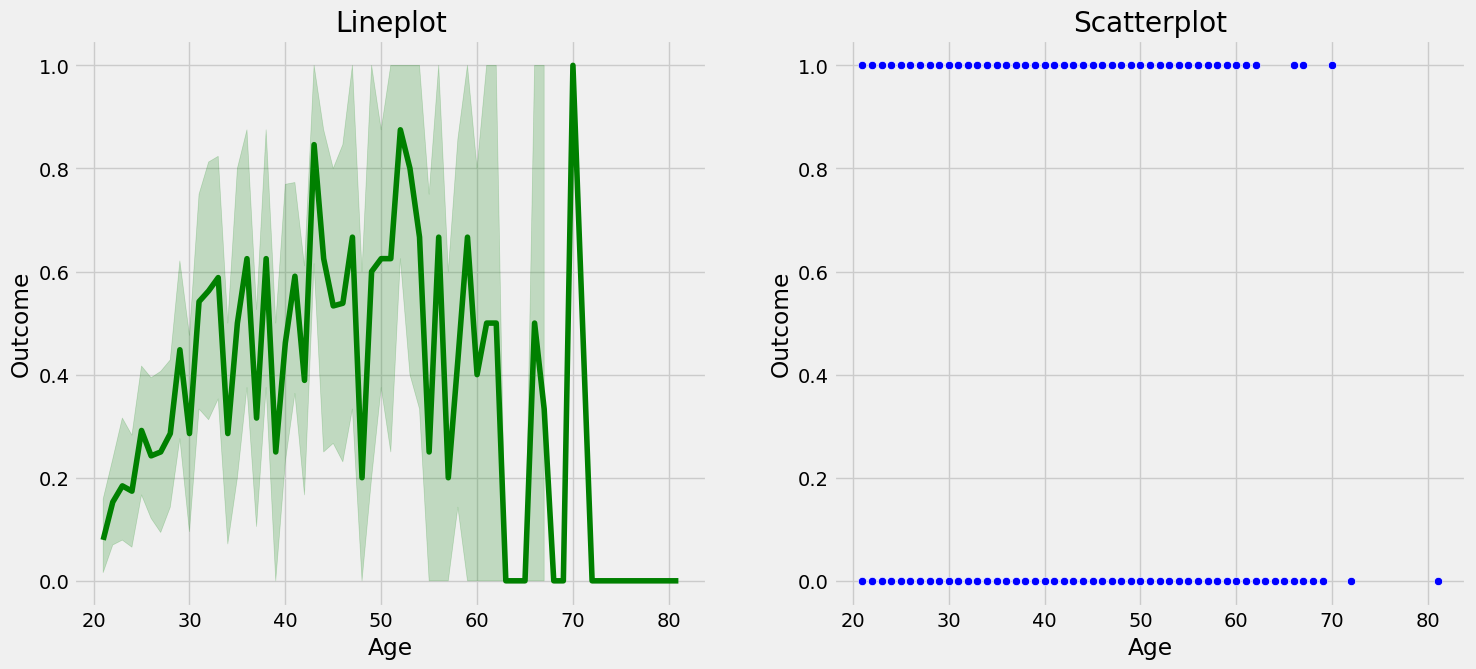

In [54]:
for col in df.select_dtypes(exclude='O').columns:
    lineplot_scatterplot(data=df,feature1='Age', feature2=col)
    

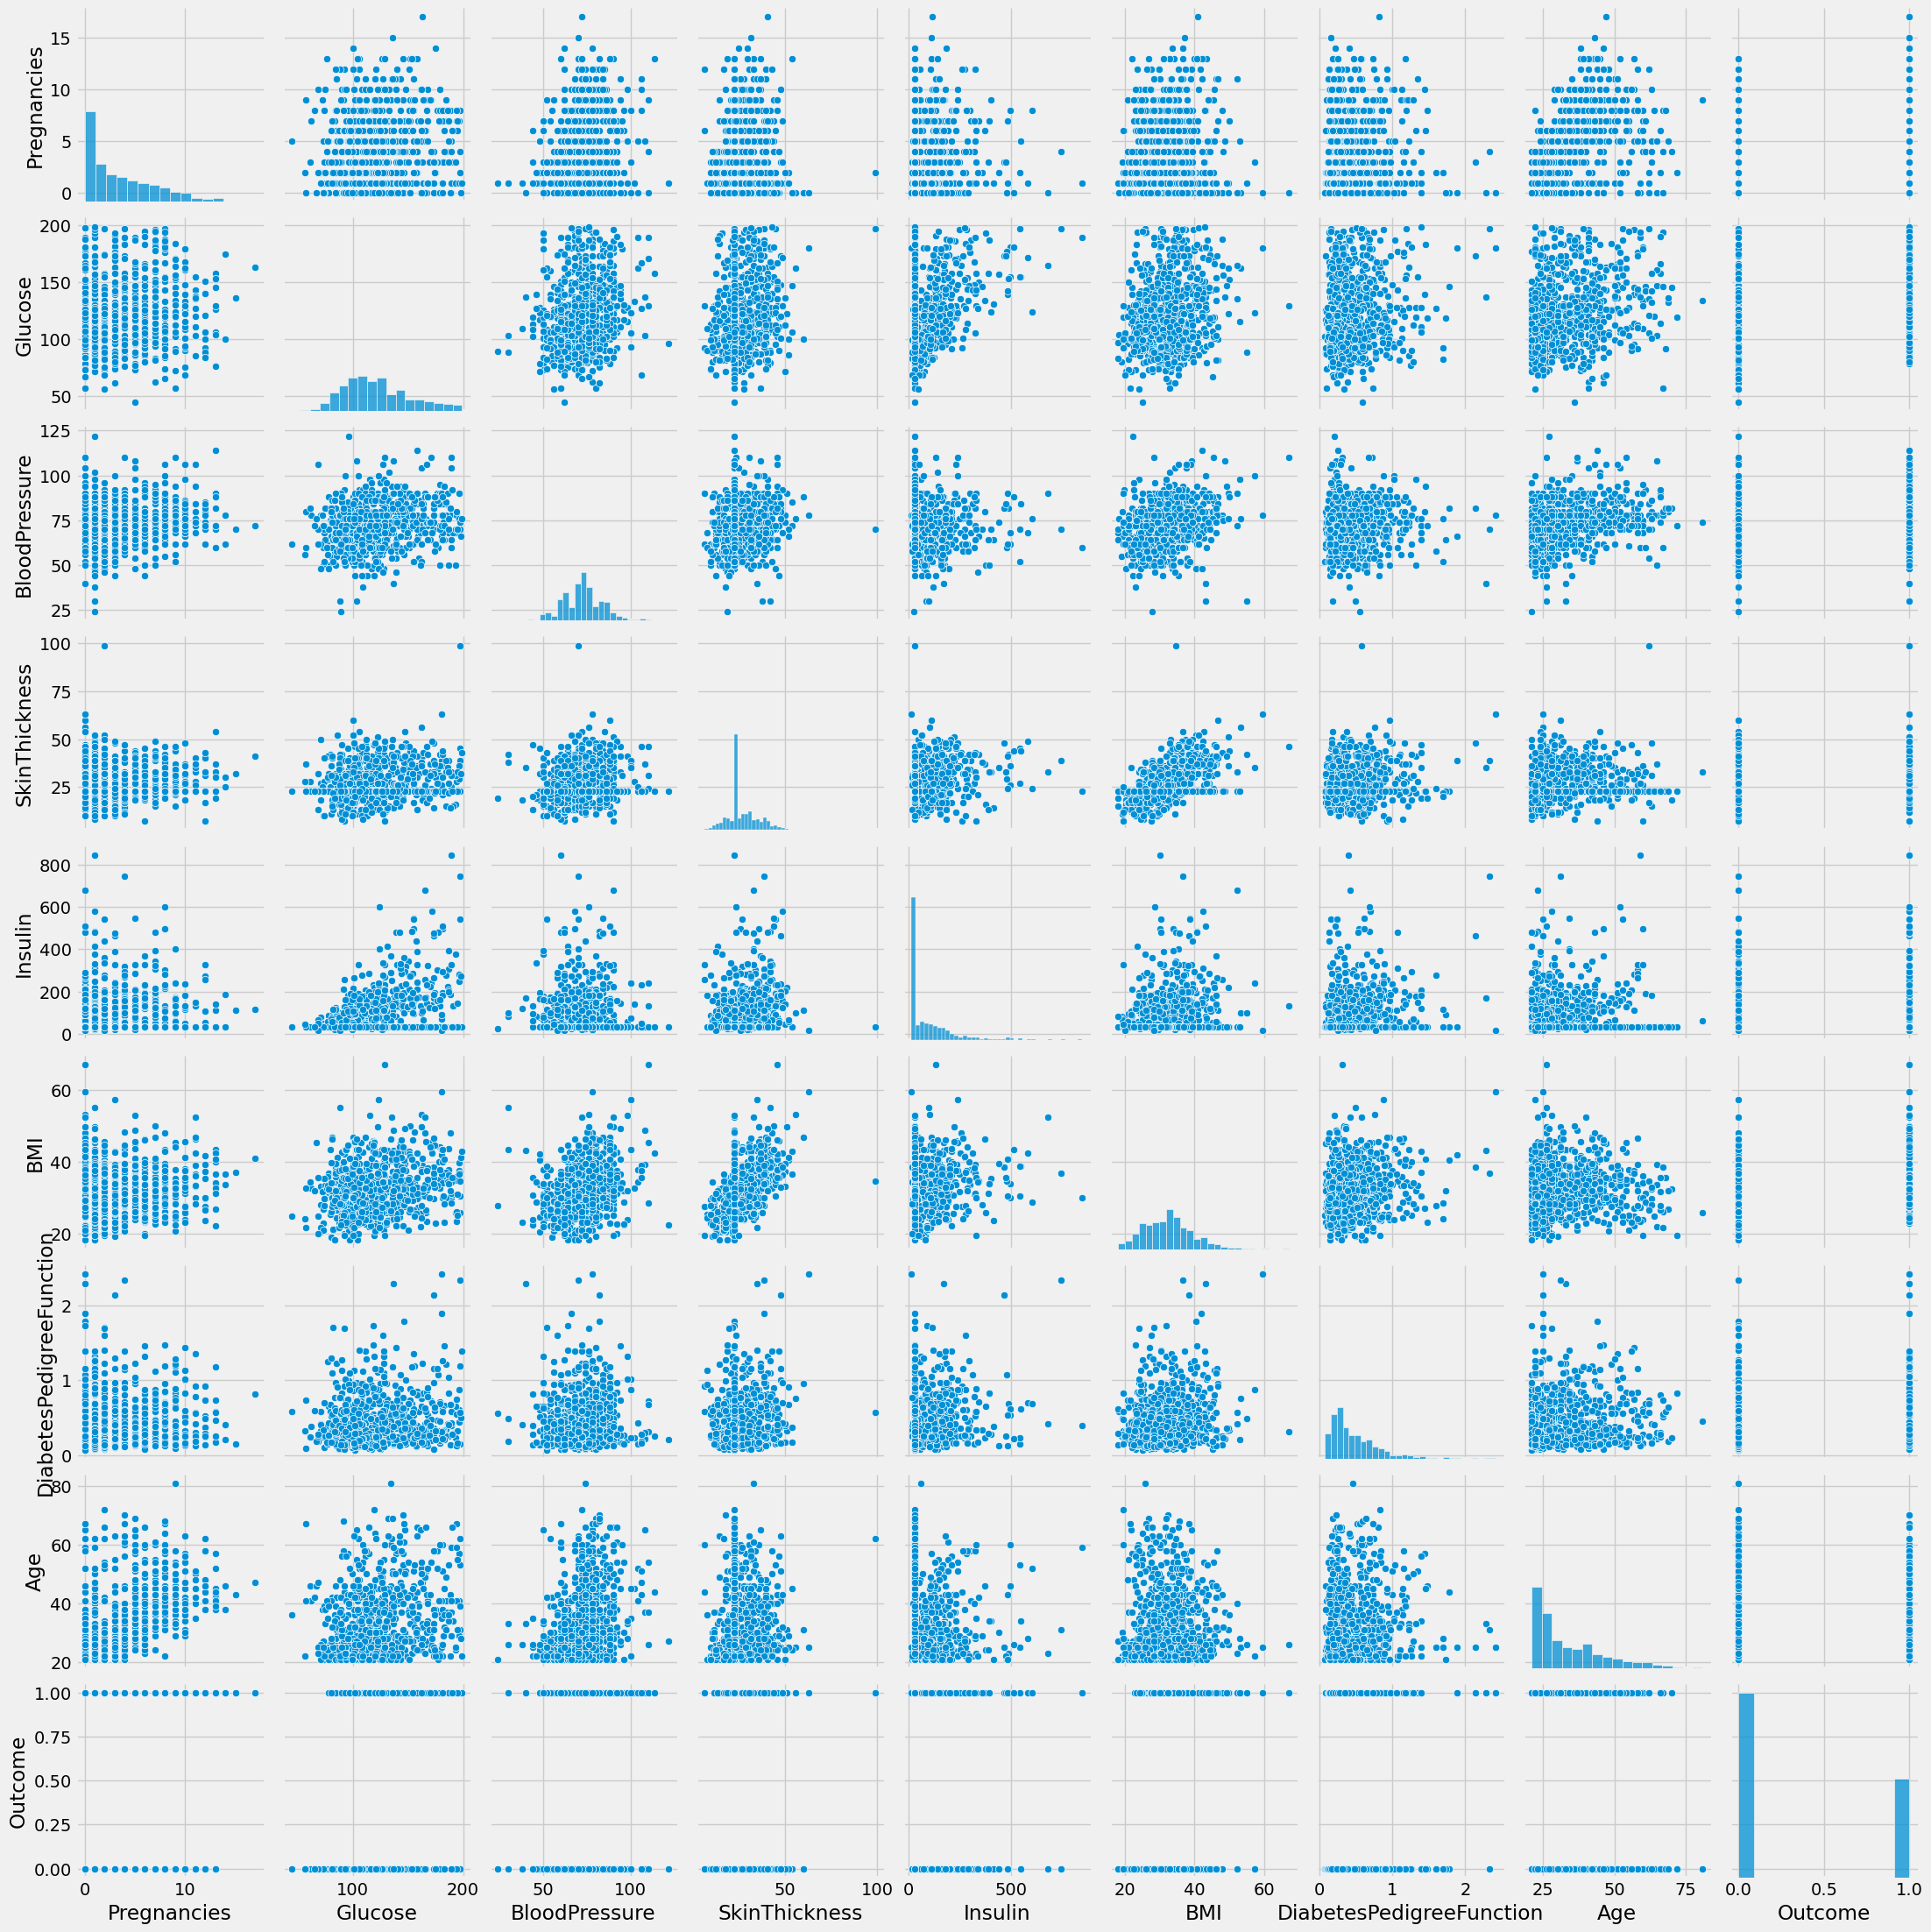

In [55]:
sns.pairplot(df)

**Observations**:

There appears to be multicollinearity between Glucose and Insulin, BMI and skin thickness.

In [56]:
# Let's look at variables most correlated with Outcome 
df[df.columns[:]].corr()['Outcome']

Pregnancies                 0.221898
Glucose                     0.492782
BloodPressure               0.165723
SkinThickness               0.189065
Insulin                     0.148457
BMI                         0.312249
DiabetesPedigreeFunction    0.173844
Age                         0.238356
Outcome                     1.000000
Name: Outcome, dtype: float64

<AxesSubplot:>

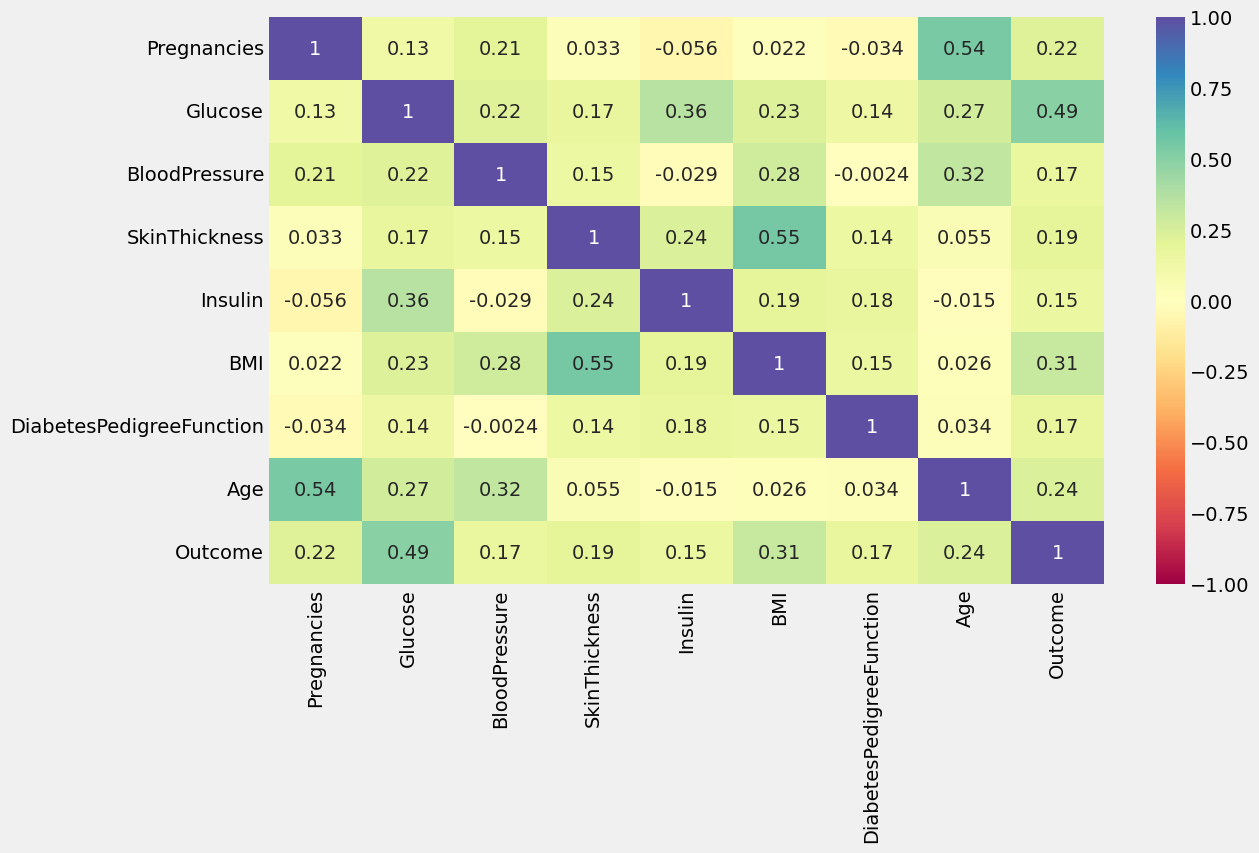

In [57]:
plt.figure(figsize=(12,7))
sns.heatmap(df.corr(), cmap='Spectral', vmax=+1, vmin=-1, annot=True)

**Observations**:

Glucose and BMI are the strongest predictors of Outcome.

### Let's create an app to display these charts 

In [58]:
#!pip install streamlit

In [59]:
%%writefile eda.py
import streamlit as st
st.title("The EDA Page")
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
st.set_option('deprecation.showPyplotGlobalUse', False)
plt.style.use('fivethirtyeight')

#load and clean the data
data=pd.read_csv("data/data.csv")
data.drop('Unnamed: 0', axis=1, inplace=True)
zerofiller=lambda x:x.replace(0, x.median())
cols=data.columns[1:6]
data[cols]=data[cols].apply(zerofiller, 0)
# encode the categorical outcome variable
df=data.copy()
d={"Yes":1, 'No':0}
df['Outcome']=df['Outcome'].map(d)
def view_data(data):
    st.write(df.head(10))
    st.pyplot()

def histograms(df):
    df.hist()
    plt.tight_layout()
    st.pyplot()
    
def barplot(data, feature):
    print("Bar plot of the variable ", feature)
    plt.figure(figsize=(10,7))
    ax=sns.countplot(data=data, x=feature, color='green')
    for p in ax.patches:
        x=p.get_bbox().get_points()[:,0]
        y=p.get_bbox().get_points()[1,1]
        ax.annotate("{:.2g}%".format(100.*y/len(df)), (x.mean(), y), ha='center', va='bottom')
    st.pyplot()
    
def boxplot_histplot(data, feature, bins=None, figsize=(12,7)):
    print('Boxplot and Histplot for ', feature)
    fig, (ax_box, ax_hist)=plt.subplots(
    nrows=2,
    sharex=True,
    gridspec_kw = {"height_ratios":(0.25, 0.75)},
    figsize=figsize
    )
    sns.boxplot(data=data, x=feature, color='violet', ax=ax_box, showmeans=True)
    sns.histplotplot(data=data, x=feature, ax=ax_hist, bins=bins)   if bins else sns.histplot(data\
                            =data, x=feature, ax=ax_hist)  
    ax_hist.axvline(data[feature].mean(), color='green', linestyle='--')
    ax_hist.axvline(data[feature].median(), color='black', linestyle='-')
    st.pyplot()
    
st.sidebar.subheader("Choose the Plot")
plot=st.sidebar.selectbox('plot', ('Data', 'Histograms', 'Barchart', 'Boxplot_Scatterplot', 'Correlations'))

if st.sidebar.button('PLOT'):
    if plot=='Data':
        view_data(df)
    if plot=='Histograms':
        histograms(df)
    if plot=='Barchart':
        barplot(df, feature='Outcome')
    if plot=='Boxplot_Scatterplot':
        for col in df.select_dtypes(exclude='O').columns:
            boxplot_histplot(df, col)
    if plot=='Correlations':
        plt.figure(figsize=(12,7))
        sns.heatmap(df.corr(), cmap='Spectral', vmax=+1, vmin=-1, annot=True)
        st.pyplot()
        
        
        
        

Overwriting eda.py


## STEP 5 : Preprocessing
- Seperate the features and labels.
- Impute null values.
- Encode categorial variables.
- Solve data imbalance.
- Train Test Split.
- Standard Scaling.
- DOUBT with STANDARD SCALING.

In [60]:

#Creating a function
def preprocess(data , label):
    #seperate the features and labels
    X = df.drop(columns = label)
    y = df[label]
    #solve data imbalance
    sm = SMOTE()
    X,y = sm.fit_resample(X,y)
    #train test split
    X_train , X_test , y_train , y_test = train_test_split(X , y , random_state = 42 , test_size = 0.3)
    return X_train , X_test , y_train , y_test



In [61]:
X_train , X_test , y_train , y_test = preprocess(df,'Outcome')
X_test

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
521,3,124,80,33,130.000000,33.200000,0.305000,26
737,8,65,72,23,30.500000,32.000000,0.600000,42
740,11,120,80,37,150.000000,42.300000,0.785000,48
660,10,162,84,23,30.500000,27.700000,0.182000,54
411,1,112,72,30,176.000000,34.400000,0.528000,25
...,...,...,...,...,...,...,...,...
468,8,120,72,23,30.500000,30.000000,0.183000,38
935,7,178,72,40,129.641219,32.499083,0.686638,35
428,0,135,94,46,145.000000,40.600000,0.284000,26
7,10,115,72,23,30.500000,35.300000,0.134000,29


# Scale the features


In [62]:
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

print('X_train : ',X_train.shape)
print('X_test : ',X_test.shape)
print('y_train : ',y_train.shape)
print('y_test : ',y_test.shape)



X_train :  (700, 8)
X_test :  (300, 8)
y_train :  (700,)
y_test :  (300,)


##### The Preprocessing is done. The data is ready for modelling

## Step 6 : Fit & Evaluate


In [63]:
def print_metrics(y_test , y_pres , model_name):
    print('Metrics for the model : ',model_name,'\n')
    print('Accuracy Score : ',accuracy_score(y_test , y_pred))
    print('Precision Score : ',precision_score(y_test , y_pred))
    print('Recall Score : ',recall_score(y_test , y_pred))
    print('F1 Score : ',f1_score(y_test , y_pred))
    print('ROC AUC Score : ',roc_auc_score(y_test , y_pred))
    print('Classification Report : \n\n',classification_report(y_test , y_pred))

In [64]:
def plot_metrics(clf , X_test , y_test , model_name):
    print('Metric for the model')
    plot_confusion_matrix(clf , X_test , y_test , display_labels= [0,1])
    print('')
    plot_roc_curve(clf , X_test , y_test)
    print('')
    plot_precision_recall_curve(clf , X_test , y_test)



In [65]:
#Fit and evaluate KNN Model
knn = KNeighborsClassifier()
knn.fit(X_train , y_train)
y_pred = knn.predict(X_test)
print_metrics(y_test , y_pred , 'KNN')



Metrics for the model :  KNN 

Accuracy Score :  0.7966666666666666
Precision Score :  0.75
Recall Score :  0.8940397350993378
F1 Score :  0.8157099697885197
ROC AUC Score :  0.7960131561402729
Classification Report : 

               precision    recall  f1-score   support

           0       0.87      0.70      0.77       149
           1       0.75      0.89      0.82       151

    accuracy                           0.80       300
   macro avg       0.81      0.80      0.79       300
weighted avg       0.81      0.80      0.79       300



Metric for the model




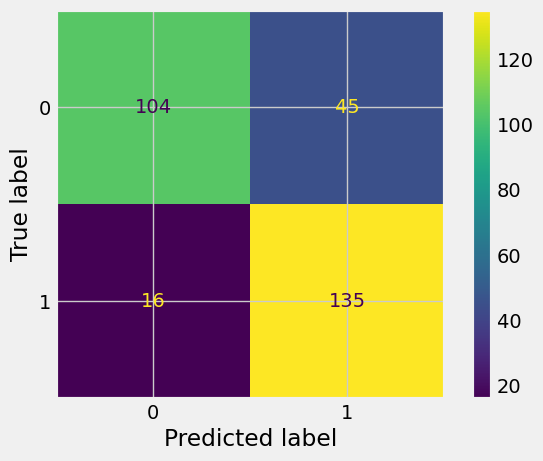

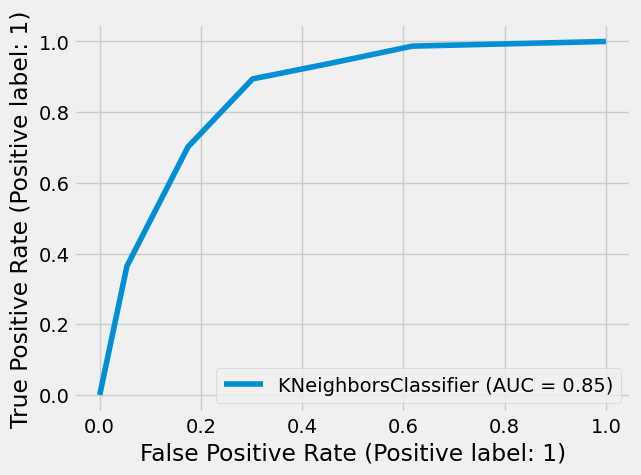

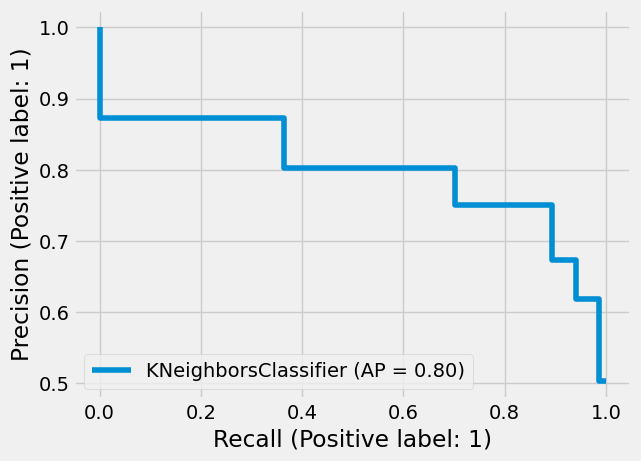

In [66]:
plot_metrics(knn , X_test , y_test,'KNN')

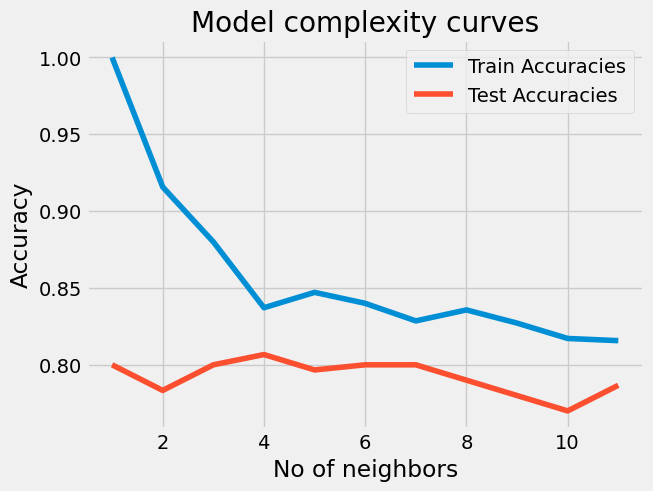

In [69]:
# let's tune the hyperparameter of knn

neighbors = np.arange(1, 12)
train_accuracies = np.empty(len(neighbors))
test_accuracies = np.empty(len(neighbors))

for i, k in enumerate(neighbors):
    knn = KNeighborsClassifier(n_neighbors = k)
    knn.fit(X_train, y_train)
    train_accuracies[i] = knn.score(X_train, y_train)
    test_accuracies[i] = knn.score(X_test, y_test)
    
    
# plot the model complexity curves

plt.title('Model complexity curves')
plt.plot(neighbors, train_accuracies, label = 'Train Accuracies')
plt.plot(neighbors, test_accuracies, label = 'Test Accuracies')
plt.legend()
plt.xlabel('No of neighbors')
plt.ylabel('Accuracy')
plt.show()

In [70]:
# refitting the model with neighbor = 8

knn = KNeighborsClassifier(n_neighbors = 8)
knn.fit(X_train, y_train)
y_pred = knn.predict(X_test)
print_metrics(y_test, y_pred, 'KNN')

Metrics for the model :  KNN 

Accuracy Score :  0.79
Precision Score :  0.7784810126582279
Recall Score :  0.8145695364238411
F1 Score :  0.796116504854369
ROC AUC Score :  0.7898351037823903
Classification Report : 

               precision    recall  f1-score   support

           0       0.80      0.77      0.78       149
           1       0.78      0.81      0.80       151

    accuracy                           0.79       300
   macro avg       0.79      0.79      0.79       300
weighted avg       0.79      0.79      0.79       300



In [104]:
# let's fit all the models at once and decide the one to optimize

clf = {
    "Logreg" : LogisticRegression(),
    "KNN" : KNeighborsClassifier(),
    "Naive Bayes" : GaussianNB(),
    "Decision Tree" : DecisionTreeClassifier(),
    'Random forest' : RandomForestClassifier(),
    "AdaBoost" : AdaBoostClassifier(),
    "GradientBoosting" : GradientBoostingClassifier(),
    "XGBoost" : XGBClassifier(),
    'SVM' : SVC()
}

models_report = pd.DataFrame(columns = ['model', 'accuracy', 'recall', 'precision', 'F1 Score'])

for clf, clf_name in list(zip(clf.values(), clf.keys())):
    clf.fit(X_train, y_train)
    y_pred = clf.predict(X_test)
    print('Fitting the model ..... ', clf_name)
    t = pd.Series({'model' : clf_name,
                   'accuracy' : accuracy_score(y_test, y_pred),
                   'recall' : recall_score(y_test, y_pred),
                   'precision' : precision_score(y_test, y_pred), 
                   'F1 Score' : f1_score(y_test, y_pred)})
    models_report = models_report.append(t, ignore_index = True)
    
models_report = models_report.sort_values(by=['F1 Score', 'model'], ascending=[False, True])
models_report

Fitting the model .....  Logreg
Fitting the model .....  KNN
Fitting the model .....  Naive Bayes
Fitting the model .....  Decision Tree
Fitting the model .....  Random forest
Fitting the model .....  AdaBoost
Fitting the model .....  GradientBoosting
Fitting the model .....  XGBoost
Fitting the model .....  SVM


,model,accuracy,recall,precision,F1 Score
1,KNN,0.796667,0.894040,0.750000,0.815710
6,GradientBoosting,0.793333,0.847682,0.766467,0.805031
4,Random forest,0.790000,0.834437,0.768293,0.800000
7,XGBoost,0.773333,0.834437,0.745562,0.787500
8,SVM,0.776667,0.814570,0.759259,0.785942
5,AdaBoost,0.763333,0.814570,0.740964,0.776025
3,Decision Tree,0.746667,0.794702,0.727273,0.759494
0,Logreg,0.746667,0.721854,0.762238,0.741497
2,Naive Bayes,0.723333,0.649007,0.765625,0.702509


Usually, in all cases, Random Forest and SVM will top the list 

In [106]:
rfc = RandomForestClassifier()
rfc.fit(X_train, y_train)
y_pred = rfc.predict(X_test)
print_metrics(y_test, y_pred, 'RFC')

Metrics for the model :  RFC 

Accuracy Score :  0.8
Precision Score :  0.7724550898203593
Recall Score :  0.8543046357615894
F1 Score :  0.8113207547169813
ROC AUC Score :  0.7996355393573048
Classification Report : 

               precision    recall  f1-score   support

           0       0.83      0.74      0.79       149
           1       0.77      0.85      0.81       151

    accuracy                           0.80       300
   macro avg       0.80      0.80      0.80       300
weighted avg       0.80      0.80      0.80       300



In [107]:
# let's optimize Random Forest
import time

start_time = time.time()

tuned_params = {'n_estimators' : [100, 150, 200],
               'min_samples_leaf' : range(1, 5, 1),
               'min_samples_split' : range(2, 10, 2),
               'max_depth' : [1, 2, 3, 4, 5],
               'max_features' : ['sqrt', 'log2'],
               'criterion' : ['gini', 'entropy']}

n_folds = 3
CV = GridSearchCV(estimator = rfc, param_grid = tuned_params, cv = n_folds, n_jobs = -1,
                 return_train_score = False, verbose = 3, scoring = 'f1')

CV.fit(X_train, y_train)

end_time = time.time()

print("Time taken to run the code is", end_time - start_time)

Fitting 3 folds for each of 960 candidates, totalling 2880 fits
Time taken to run the code is 192.4578251838684


In [108]:
CV.best_estimator_

RandomForestClassifier(criterion='entropy', max_depth=5, max_features='sqrt')

In [109]:
CV.best_params_

{'criterion': 'entropy',
 'max_depth': 5,
 'max_features': 'sqrt',
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'n_estimators': 100}

In [117]:
rfc_tuned = RandomForestClassifier(criterion='entropy', max_depth=5, max_features='sqrt',
                       min_samples_leaf=1, min_samples_split=2,
                       n_estimators=100)

rfc_tuned.fit(X_train , y_train)
y_pred = rfc_tuned.predict(X_test)
print_metrics(y_test , y_pred , 'RFC Tuned')

Metrics for the model :  RFC Tuned 

Accuracy Score :  0.7833333333333333
Precision Score :  0.7590361445783133
Recall Score :  0.8344370860927153
F1 Score :  0.7949526813880128
ROC AUC Score :  0.7829903551268945
Classification Report : 

               precision    recall  f1-score   support

           0       0.81      0.73      0.77       149
           1       0.76      0.83      0.79       151

    accuracy                           0.78       300
   macro avg       0.79      0.78      0.78       300
weighted avg       0.79      0.78      0.78       300



In [100]:
## !pip install shap

     -------------------------------------- 435.6/435.6 kB 4.5 MB/s eta 0:00:00


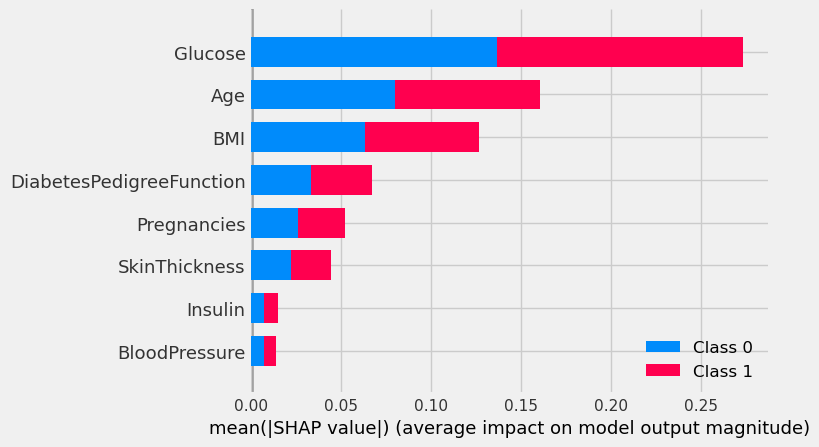

In [118]:
import shap
X = df.drop(columns = 'Outcome')
value = shap.TreeExplainer(rfc_tuned).shap_values(X_test)
shap.summary_plot(value, X_train, plot_type = 'bar', feature_names = X.columns)

## Create pipeline for deployment

In [169]:
from sklearn.pipeline import Pipeline
sc = StandardScaler()
rfc_tuned = rfc_tuned
x_train, x_test, y_train, y_test = preprocess(df, 'Outcome')
steps = [('scaling', sc), ('rfc tuned', rfc_tuned)]
pipeline = Pipeline(steps)
pipeline.fit(x_train, y_train)
y_pred = pipeline.predict(x_test)
print_metrics(y_test, y_pred, 'Pipeline')

Metrics for the model :  Pipeline 

Accuracy Score :  0.8066666666666666
Precision Score :  0.7657142857142857
Recall Score :  0.8874172185430463
F1 Score :  0.8220858895705521
ROC AUC Score :  0.8061247166540736
Classification Report : 

               precision    recall  f1-score   support

           0       0.86      0.72      0.79       149
           1       0.77      0.89      0.82       151

    accuracy                           0.81       300
   macro avg       0.81      0.81      0.81       300
weighted avg       0.81      0.81      0.81       300



In [164]:
# pickle the pipeline

import pickle

model = open('rfc_tuned.pickle', 'wb')
pickle.dump(pipeline, model)
model.close()

## Deployment of the Pickled model

In [174]:
%%writefile app.py
import streamlit as st
from sklearn.preprocessing import StandardScaler
import pandas as pd
import pickle

st.title('Medical Diagnostic Web App 👨🏽‍⚕')

# Step 1: Load the model
model = open("rfc_tuned.pickle", 'rb')
clf = pickle.load(model)
model.close()

# Step 2: Get the front end user input

pregs = st.number_input('Pregnancies', 1, 20, step = 1)
glucose = st.slider('Glucose', 40.0, 200.0, 40.0)
bp = st.slider('BloodPressure', 24, 122, 24)
skin = st.slider('SkinThickness', 7, 99, 7)
ins = st.slider('Insulin', 14.0, 846.0, 14.0) 
bmi = st.slider('BMI', 18.2, 67.1, 18.2) 
diab = st.slider('DiabetesPedigreeFunction', 0.078, 2.420, 0.078)
age = st.slider('Age', 21, 81, 21)

# Step 3: Converting user input to model input

data = {'Pregnancies' : pregs,
        'Glucose': glucose, 
        'BloodPressure' : bp,
        'SkinThickness' : skin,
        'Insulin' : ins,
       'BMI' : bmi, 
        'DiabetesPedigreeFunction' : diab,
        'Age' : age}

input_data = pd.DataFrame([data])

# Step 4 : Get the predictions

preds = clf.predict(input_data)[0]
if st.button('Predict'):
    if preds == 1:
        st.error('The person has diabetes')
    if preds == 0:
        st.success('The person is Diabetes Free')

Overwriting app.py
